In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
x = df
x.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.33, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
test_pred = model.predict(X_test)
test_pred

array([14.7, 19.8, 11.9, 16.7, 11. ,  6.6, 20.2, 17. , 10.3, 20.1, 10.9,
       17.1, 16.5, 23.7, 19.2, 10.1, 17. , 11.9,  8.4, 21.5,  7.6, 16. ,
       27. , 24.2, 11.3, 16.4, 20.7,  9.7, 17.6, 12. ,  9.2, 19.6, 14. ,
        5.6, 17.1, 13.2, 10.6, 14. ,  7.3, 15.5, 12.5, 10.3, 12.3,  7. ,
       11.8, 11.3,  5.3, 19.8, 17.9, 22.4, 10.4, 17.9, 19.8, 11.9, 15.6,
        3.2, 25.4, 10.8, 17.4, 16.1, 20.2, 26.2, 11.9, 21.2, 16.7, 22.2])

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(y_test, test_pred)

3.3979553177921457e-15

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, test_pred)

1.8792220579299026e-29

In [21]:
np.sqrt(mean_squared_error(y_test, test_pred))

4.334999490115198e-15

In [23]:
test_residual = y_test - test_pred
test_residual.head()

37    -7.105427e-15
109    3.552714e-15
31     0.000000e+00
89    -3.552714e-15
66    -1.776357e-15
Name: Sales, dtype: float64

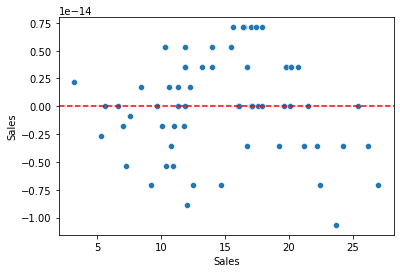

In [25]:
sns.scatterplot(x=y_test, y= test_residual) #residual plot
plt.axhline(y=0, color='red', ls='--')

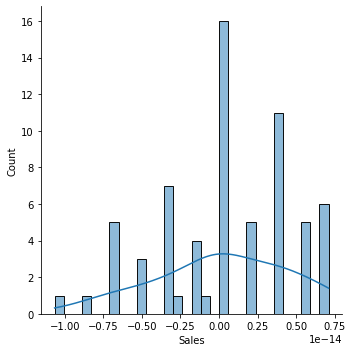

In [26]:
sns.displot(test_residual, bins=30, kde=True)

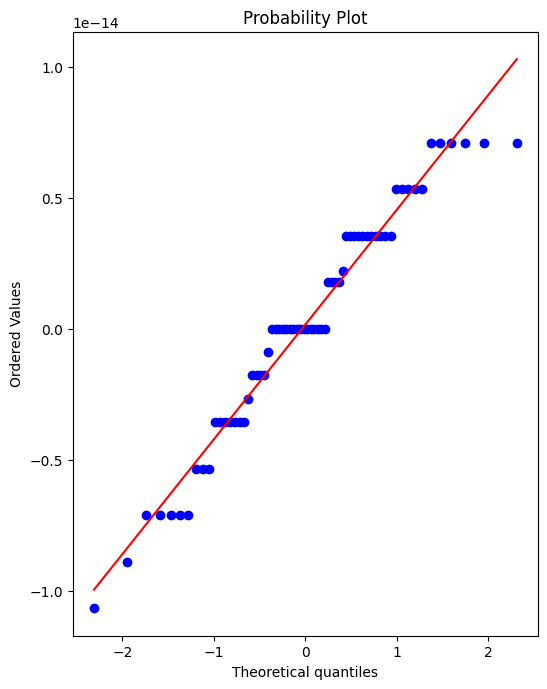

In [27]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residual,plot=ax)

In [28]:
model.coef_

array([-2.93264179e-17,  2.22044605e-16,  2.77555756e-17,  1.00000000e+00])

In [29]:
y_hat = model.predict(x)

Text(0.5, 1.0, 'Newspaper Spend')

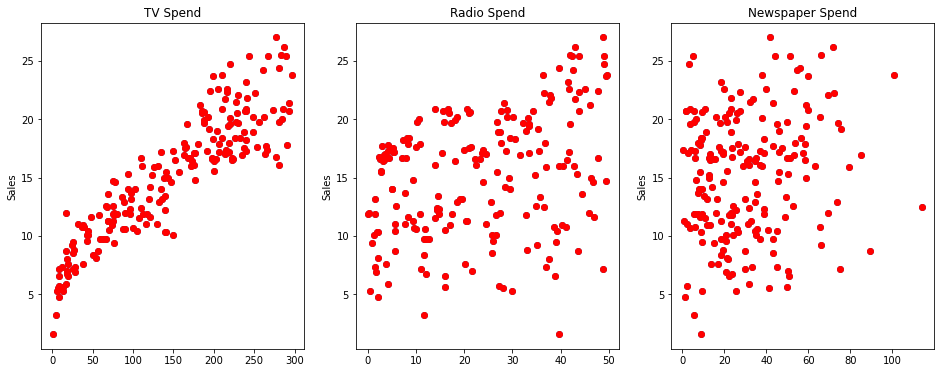

In [30]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")